In [24]:
# cargamos las librerias en el sistema
import rasterio
import rasterio.mask
import geopandas as gpd
import rioxarray as rxr
from geocube.api.core import make_geocube
import os

In [2]:
shp = gpd.read_file('shp/ClasVisual_042023.shp')
shp

,OBJECTID,Name,Code,Shape_Leng,Shape_Area,geometry
0,1,1 ParB,3,1904.002190,42754.872071,"POLYGON ((559679.438 888813.491, 559680.232 88..."
1,2,1 ParB,4,1780.842289,131007.732503,"POLYGON ((559679.438 888813.491, 559280.284 88..."
2,3,1 ParB,16,1525.451701,76237.395426,"POLYGON ((559780.284 888847.537, 559771.831 88..."
3,4,10 ParB,1,1741.281341,147916.131599,"POLYGON ((572700.402 919661.934, 572701.952 91..."
4,5,10 ParB,5,2472.043165,40912.174507,"MULTIPOLYGON (((572609.894 919661.934, 572600...."
...,...,...,...,...,...,...
188,190,Anexo 8,16,639.818516,6931.458661,"MULTIPOLYGON (((568244.425 922492.041, 568208...."
189,191,Anexo 8,20,1698.600182,31146.568475,"POLYGON ((568684.797 922631.520, 568684.797 92..."
190,192,Anexo 9,2,1729.557193,49142.763716,"POLYGON ((567341.953 922277.345, 567124.818 92..."
191,193,Anexo 9,4,933.681396,22086.093936,"MULTIPOLYGON (((567193.220 922665.429, 567174...."


In [3]:
sitios = shp.Name.unique()
sitios

array(['1 ParB', '10 ParB', '11 ParB', '12 ParB', '13 ParB', '14 ParB',
       '15 ParB a', '15 ParB b', '17 ParB', '18 ParB', '19 ParB',
       '2 ParB', '20 ParB', '21 ParB a', '21 ParBb', '3 ParB', '4 ParB',
       '5 ParB', '6 ParB', '7 ParB', '8 ParB', '9 ParB', 'Anexo 1',
       'Anexo 10', 'Anexo 11', 'Anexo 12', 'Anexo 13', 'Anexo 14',
       'Anexo 15', 'Anexo 16', 'Anexo 18', 'Anexo 19', 'Anexo 2',
       'Anexo 20', 'Anexo 3', 'Anexo 4', 'Anexo 5', 'Anexo 6', 'Anexo 7',
       'Anexo 8', 'Anexo 9'], dtype=object)

In [22]:
# remove Anexo 15 from list
sitios = [x for x in sitios if x != 'Anexo 15']
sitios

['1 ParB',
 '10 ParB',
 '11 ParB',
 '12 ParB',
 '13 ParB',
 '14 ParB',
 '15 ParB a',
 '15 ParB b',
 '17 ParB',
 '18 ParB',
 '19 ParB',
 '2 ParB',
 '20 ParB',
 '21 ParB a',
 '21 ParBb',
 '3 ParB',
 '4 ParB',
 '5 ParB',
 '6 ParB',
 '7 ParB',
 '8 ParB',
 '9 ParB',
 'Anexo 1',
 'Anexo 10',
 'Anexo 11',
 'Anexo 12',
 'Anexo 13',
 'Anexo 14',
 'Anexo 16',
 'Anexo 18',
 'Anexo 19',
 'Anexo 2',
 'Anexo 20',
 'Anexo 3',
 'Anexo 4',
 'Anexo 5',
 'Anexo 6',
 'Anexo 7',
 'Anexo 8',
 'Anexo 9']

In [7]:
# create a label folder if it does not exist using python
if not os.path.exists('labels_shp'):
    os.makedirs('labels_shp')

In [8]:
for site in sitios:
    print(site)
    sitio_id = shp.where(shp.Name == site).dropna()
    # sate to labels_shape folder
    sitio_id.to_file('labels_shp/{}.gpkg'.format(site), driver='GPKG')  


1 ParB
10 ParB
11 ParB
12 ParB
13 ParB
14 ParB
15 ParB a
15 ParB b
17 ParB
18 ParB
19 ParB
2 ParB
20 ParB
21 ParB a
21 ParBb
3 ParB
4 ParB
5 ParB
6 ParB
7 ParB
8 ParB
9 ParB
Anexo 1
Anexo 10
Anexo 11
Anexo 12
Anexo 13
Anexo 14
Anexo 15
Anexo 16
Anexo 18
Anexo 19
Anexo 2
Anexo 20
Anexo 3
Anexo 4
Anexo 5
Anexo 6
Anexo 7
Anexo 8
Anexo 9


In [9]:
# create a label folder if it does not exist using python
if not os.path.exists('labels_raster'):
    os.makedirs('labels_raster')

In [23]:
for site in sitios:
    print(site)
    # rasterize
    out_grid = make_geocube(
        vector_data = 'labels_shp/' + site + '.gpkg',
        measurements = ["Code"],
        resolution = (-0.5, 0.5), # resolution of the MAXAR image
    )
    out_grid["Code"].rio.to_raster('labels_raster/' + site + '.tif')

1 ParB
10 ParB
11 ParB
12 ParB
13 ParB
14 ParB
15 ParB a
15 ParB b
17 ParB
18 ParB
19 ParB
2 ParB
20 ParB
21 ParB a
21 ParBb
3 ParB
4 ParB
5 ParB
6 ParB
7 ParB
8 ParB
9 ParB
Anexo 1
Anexo 10
Anexo 11
Anexo 12
Anexo 13
Anexo 14
Anexo 16
Anexo 18
Anexo 19
Anexo 2
Anexo 20
Anexo 3
Anexo 4
Anexo 5
Anexo 6
Anexo 7
Anexo 8
Anexo 9


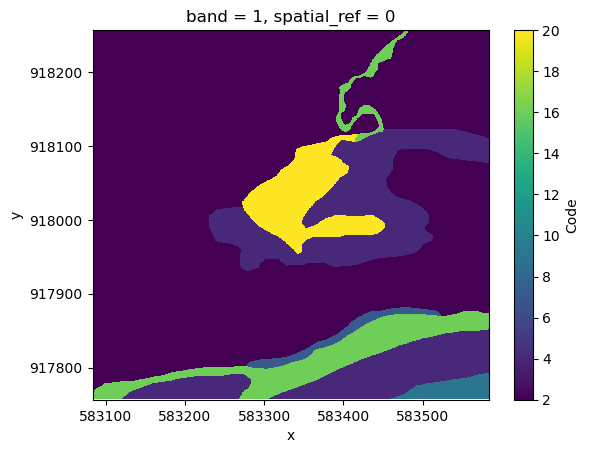

In [28]:
# load lebel examples
test = rxr.open_rasterio('labels_raster/Anexo 1.tif')
test.plot()